In [55]:
import pandas as pd
import geopandas as gpd

In [56]:
relative_path = "../data/raw/hotel_booking.csv"

In [312]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [257]:
df_with_id =df.reset_index().rename(columns={"index":"guest_id"})
df_with_id

,guest_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,4,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [57]:
df = pd.read_csv(relative_path)


In [277]:
df_grouped = df_with_id.groupby(['hotel','arrival_date_year','arrival_date_month']).count()[['guest_id']].rename(columns={"guest_id":"arrivals"})
df_grouped = df_grouped.reset_index()
df_grouped['arrival_month']= pd.to_datetime(df_grouped['arrival_date_month'], format="%B").dt.month
df_grouped = df_grouped.sort_values(by=['hotel','arrival_date_year', 'arrival_month'])
df_grouped = df_grouped.groupby(['hotel','arrival_month']).agg({"arrivals":'mean'}).reset_index()
df_grouped

,hotel,arrival_month,arrivals
0,City Hotel,1,1868.000000
1,City Hotel,2,2482.500000
2,City Hotel,3,3229.000000
3,City Hotel,4,3740.000000
4,City Hotel,5,4116.000000
5,City Hotel,6,3947.000000
6,City Hotel,7,2696.000000
7,City Hotel,8,2994.333333
8,City Hotel,9,3700.000000
9,City Hotel,10,3802.500000


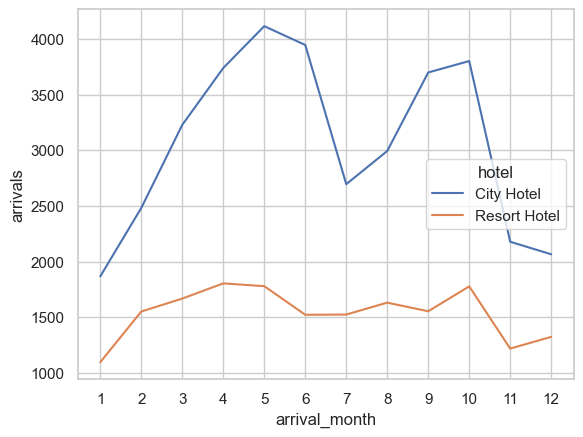

In [283]:
import numpy as np

ax=sns.lineplot(data=df_grouped, x='arrival_month', y='arrivals', hue='hotel')
ax.set_xticks(np.arange(1,13))
plt.show()

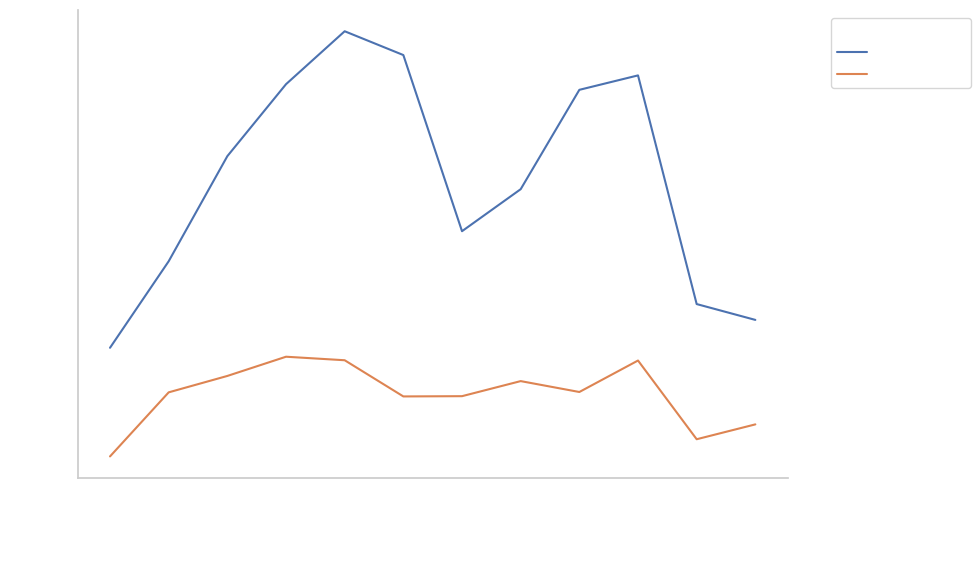

In [310]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_grouped is your DataFrame
df_grouped = df_with_id.groupby(['hotel', 'arrival_date_year', 'arrival_date_month']).count()[['guest_id']].rename(columns={"guest_id": "arrivals"})
df_grouped = df_grouped.reset_index()
df_grouped['arrival_month'] = pd.to_datetime(df_grouped['arrival_date_month'], format="%B").dt.month
df_grouped = df_grouped.sort_values(by=['hotel', 'arrival_date_year', 'arrival_month'])
df_grouped = df_grouped.groupby(['hotel', 'arrival_month']).agg({"arrivals": 'mean'}).reset_index()

# Convert month numbers to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_grouped['arrival_month'] = df_grouped['arrival_month'].map(lambda x: month_names[x - 1])

# Plot the data with lines
plt.figure(figsize=(10, 6))
for hotel, data in df_grouped.groupby('hotel'):
    plt.plot(data['arrival_month'], data['arrivals'], label=hotel)

# Set labels and title
plt.xlabel('Month', color='white')
plt.ylabel('Average Number of Arrivals', color='white')
#plt.title('Average Number of Arrivals by Month and Hotel', color='white')

# Customize legend position and color
legend = plt.legend(title='Hotel', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.setp(legend.get_texts(), color='white')  # Set legend text color to white
plt.setp(legend.get_title(), color='white')  # Set legend title color to white

# Rotate x-axis tick labels diagonally
plt.xticks(rotation=45, color='white')

# Set y-axis tick labels color to white
plt.yticks(color='white')

# Remove grid and background
plt.grid(False)
plt.gca().set_facecolor('None')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the plot
save_path = '../images/average_arrivals_by_month_and_hotel.png'
plt.savefig(save_path, transparent=True, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [60]:
for column in df.columns:
    # Check if any null values exist in the current column
    if df[column].isnull().any():
        print(f"Column '{column}' contains null values.")
    else:
        print(f"Column '{column}' does not contain any null values.")
        

Column 'hotel' does not contain any null values.
Column 'is_canceled' does not contain any null values.
Column 'lead_time' does not contain any null values.
Column 'arrival_date_year' does not contain any null values.
Column 'arrival_date_month' does not contain any null values.
Column 'arrival_date_week_number' does not contain any null values.
Column 'arrival_date_day_of_month' does not contain any null values.
Column 'stays_in_weekend_nights' does not contain any null values.
Column 'stays_in_week_nights' does not contain any null values.
Column 'adults' does not contain any null values.
Column 'children' contains null values.
Column 'babies' does not contain any null values.
Column 'meal' does not contain any null values.
Column 'country' contains null values.
Column 'market_segment' does not contain any null values.
Column 'distribution_channel' does not contain any null values.
Column 'is_repeated_guest' does not contain any null values.
Column 'previous_cancellations' does not c

In [40]:
# Filter columns with data types 'object' or 'int'
filtered_columns = df.select_dtypes(include=['object', 'int']).columns

# Loop through each filtered column and print unique values
for column in filtered_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'hotel': ['Resort Hotel' 'City Hotel']
Unique values in column 'is_canceled': [0 1]
Unique values in column 'lead_time': [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349

In [61]:
#4 columns with null values : children, country, agent and company

In [62]:
test2 = df.copy()

In [63]:
#counting null values in all the data frame 
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Number of null values in '{column}': {null_count}")

Number of null values in 'hotel': 0
Number of null values in 'is_canceled': 0
Number of null values in 'lead_time': 0
Number of null values in 'arrival_date_year': 0
Number of null values in 'arrival_date_month': 0
Number of null values in 'arrival_date_week_number': 0
Number of null values in 'arrival_date_day_of_month': 0
Number of null values in 'stays_in_weekend_nights': 0
Number of null values in 'stays_in_week_nights': 0
Number of null values in 'adults': 0
Number of null values in 'children': 4
Number of null values in 'babies': 0
Number of null values in 'meal': 0
Number of null values in 'country': 488
Number of null values in 'market_segment': 0
Number of null values in 'distribution_channel': 0
Number of null values in 'is_repeated_guest': 0
Number of null values in 'previous_cancellations': 0
Number of null values in 'previous_bookings_not_canceled': 0
Number of null values in 'reserved_room_type': 0
Number of null values in 'assigned_room_type': 0
Number of null values in 

In [64]:
#replace the null values of "children" for the value mode 
df['children'] = df['children'].fillna(df['children'].mode()[0])

#replace the null values of "country" for backwardfill 

df['country'] = df['country'].fillna(method='bfill')

#replace the null values of "agent" for the value of mode
df['agent'] = df['agent'].fillna(df['agent'].mode()[0])


/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_1497/2366600341.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['country'] = df['country'].fillna(method='bfill')


In [65]:
df.shape


(119390, 32)

In [66]:
#Dropping column "company", 94% of the values are NaN. For this reason the best to do is just drop the column. 

df.drop('company', axis=1, inplace=True)


In [67]:
# Define the expected date format
date_format = "%Y-%m-%d"

# Check if dates in a specific column follow the same format
column_name = 'reservation_status_date'

# Parse dates using the specified format and catch any parsing errors
try:
    pd.to_datetime(test2["reservation_status_date"], format=date_format, errors='raise')
    print(f"All dates in column '{column_name}' follow the format {date_format}.")
except ValueError as e:
    print(f"Not all dates in column '{column_name}' follow the format {date_format}.")
    print(f"Error message: {e}")

All dates in column 'reservation_status_date' follow the format %Y-%m-%d.


In [68]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [69]:

filtered_data = test2[(test2['hotel'] == 'Resort Hotel') | (test2['hotel'] == 'City Hotel')]

# Step 2: Group the filtered DataFrame by "policy_type" and "gender"
grouped_data = filtered_data.groupby(['hotel', 'is_canceled', "arrival_date_year"]).size()


In [70]:
display(grouped_data)

hotel         is_canceled  arrival_date_year
City Hotel    0            2015                  7678
                           2016                 22733
                           2017                 15817
              1            2015                  6004
                           2016                 15407
                           2017                 11691
Resort Hotel  0            2015                  6176
                           2016                 13637
                           2017                  9125
              1            2015                  2138
                           2016                  4930
                           2017                  4054
dtype: int64

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df["arrival_date_year"]

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119385    2017
119386    2017
119387    2017
119388    2017
119389    2017
Name: arrival_date_year, Length: 119390, dtype: int64

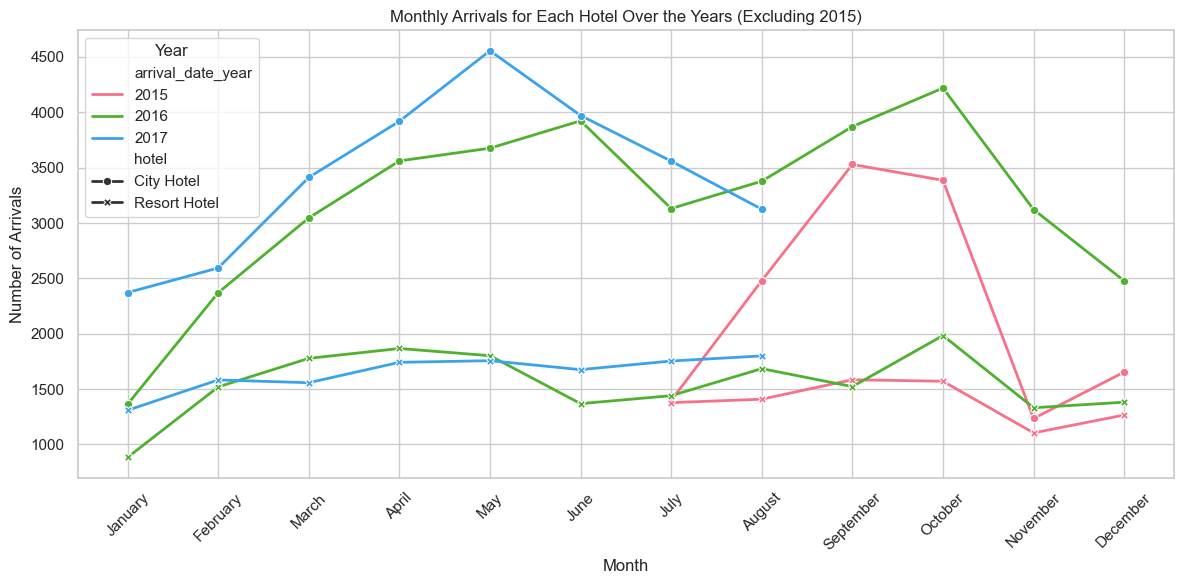

In [73]:
# Your DataFrame and plotting code
df_agg = test2.groupby(["hotel", "arrival_date_year", "arrival_date_month"]).size().reset_index(name='arrivals')
df_agg.columns = df_agg.columns.str.strip()



# Define custom order for months
custom_month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert arrival_date_month to categorical data type with custom order
df_agg['arrival_date_month'] = pd.Categorical(df_agg['arrival_date_month'], categories=custom_month_order, ordered=True)

# Get unique years and hotel types from the filtered DataFrame
unique_years = df_agg['arrival_date_year'].unique()
unique_hotels = df_agg['hotel'].unique()

# Define custom colors for years
custom_palette = sns.color_palette("husl", n_colors=len(unique_years))

# Define custom line styles for hotel types
custom_line_styles = ['-', '--']

# Create a dictionary mapping years to colors
year_color_dict = dict(zip(unique_years, custom_palette))

# Create a dictionary mapping hotel types to line styles
hotel_line_style_dict = dict(zip(unique_hotels, custom_line_styles))

# Set the style for the plots
sns.set(style="whitegrid")

# Create the line plot with adjusted transparency
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_agg, x="arrival_date_month", y="arrivals", hue="arrival_date_year", style="hotel",
             palette=year_color_dict, markers=True, dashes=False, hue_order=unique_years,
             style_order=unique_hotels, linewidth=2)

# Set axis labels and title
plt.xlabel("Month")
plt.ylabel("Number of Arrivals")
plt.title("Monthly Arrivals for Each Hotel Over the Years (Excluding 2015)")

# Show the plot
plt.legend(title="Year")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [87]:
#pivot_df = test2.pivot_table(index='hotel', columns=['arrival_date_month'], ["arrival_date_year"], values=[value], aggfunc='mean')

In [116]:
# Group by 'arrival_date_month' and sum the values
grouped_df = df_multiindex.groupby(['arrival_date_year', 'arrival_date_month', 'hotel']).sum()

# Unstack the 'hotel' level to get a column for each hotel type in different 'arrival_date_year'
result = grouped_df.unstack('hotel', fill_value=0)


In [115]:
result

is_canceled               lead_time  \
hotel                                 City Hotel Resort Hotel City Hotel   
arrival_date_year arrival_date_month                                       
2015              August                    1232          366     281819   
                  December                   668          305      93262   
                  July                       939          320     252472   
                  November                   301          185      70904   
                  October                   1321          411     346991   
                  September                 1543          551     401380   
2016              April                     1539          522     322498   
                  August                    1247          578     432374   
                  December                  1072          326     256996   
                  February                   930          407      93368   
                  January                    438          119      55462   
                  July                      1043          456     399277   
                  June                      1720          376     458424   
                  March                     1108          369     186509   
                  May                       1436          479     424550   
                  November                  1360          276     338752   
                  October                   1947          567     610123   
                  September                 1567          455     544599   
2017              April                     1926          537     418916   
                  August                    1123          693     460330   
                  February                   971          388     168860   
                  January                   1044          206     156040   
                  July                      1324          660     590484   
                  June                      1808          631     523171   
                  March                     1278          394     285976   
                  May                       2217          545     531798   

                                                  arrival_date_week_number  \
hotel                                Resort Hotel               City Hotel   
arrival_date_year arrival_date_month                                         
2015              August                   104718                    82996   
                  December                  59706                    84230   
                  July                      97215                    40811   
                  November                  41631                    57707   
                  October                  160576                   142291   
                  September                228349                   133908   
2016              April                    143481                    58436   
                  August                   183459                   114281   
                  December                  88782                   126901   
                  February                  57763                    18839   
                  January                   17650                     4825   
                  July                     164265                    91943   
                  June                     175682                    98093   
                  March                     90032                    36913   
                  May                      203636                    76409   
                  November                  69003                   145581   
                  October                  254930                   179484   
                  September                261855                   148193   
2017              April                    166596                    60909   
                  August                   218328                   102983   
                  February            

In [ ]:
df_agg_2

In [ ]:
test2["market_segment"].unique()

In [ ]:
test2["distribution_channel"].unique()

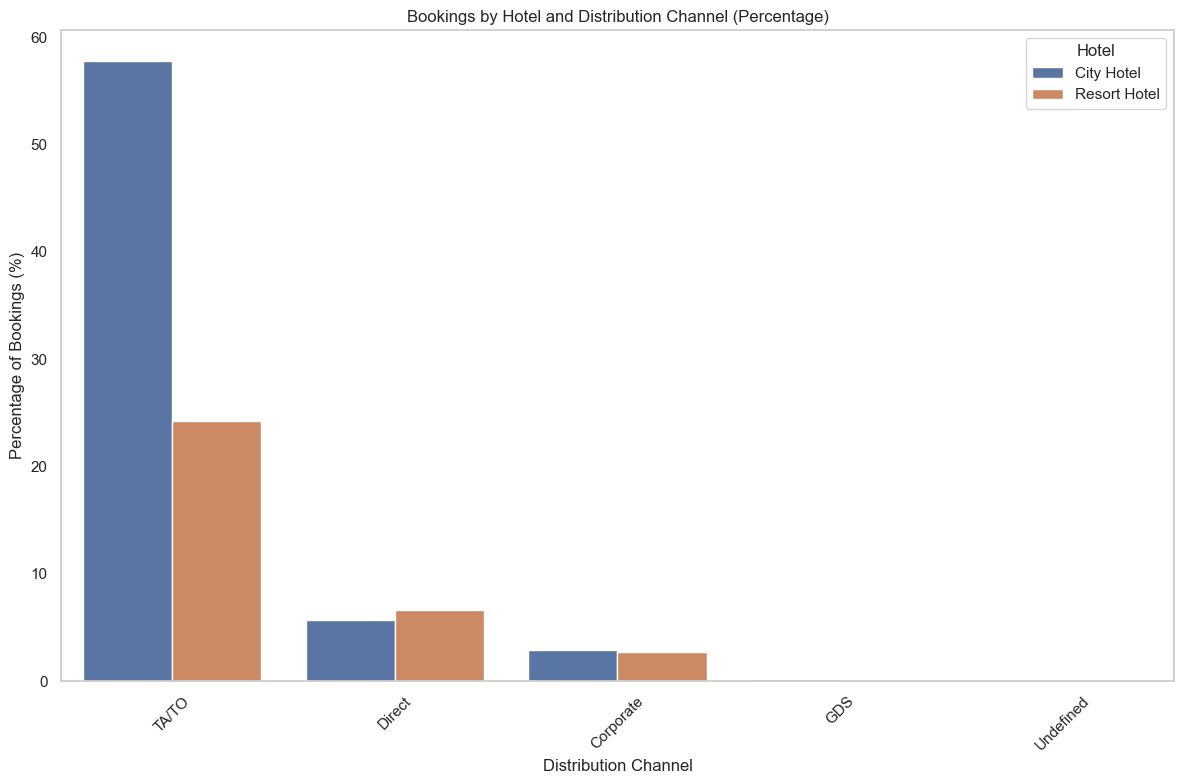

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame and plotting code
df_agg_2 = test2.groupby(["hotel", "distribution_channel"]).size().reset_index(name='Bookings')

# Calculate the total number of bookings
total_bookings = df_agg_2['Bookings'].sum()

# Calculate the percentage of bookings
df_agg_2['Percentage'] = (df_agg_2['Bookings'] / total_bookings) * 100

# Sort the DataFrame by the 'Percentage' column in descending order
df_agg_2 = df_agg_2.sort_values(by='Percentage', ascending=False)

# Set the style for the plots
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_agg_2, x="distribution_channel", y="Percentage", hue="hotel")

# Set axis labels and title
plt.xlabel("Distribution Channel")
plt.ylabel("Percentage of Bookings (%)")
plt.title("Bookings by Hotel and Distribution Channel (Percentage)")

# Show the legend
plt.legend(title="Hotel")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove the grid
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

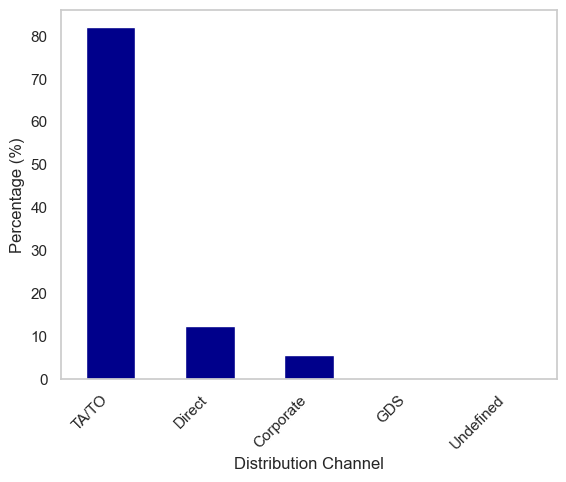

In [170]:
import matplotlib.pyplot as plt

# Calculate value counts for the distribution_channel column and normalize to get percentages
distribution_counts = df['distribution_channel'].value_counts(normalize=True) * 100

# Set figure size
plt.figure(figsize=(10, 6))

# Plot the distribution with dark blue color
ax = distribution_counts.plot(kind='bar', grid=False, color='darkblue')

# Add labels and title
plt.xlabel('Distribution Channel')
plt.ylabel('Percentage (%)')

# Rotate the x-axis labels diagonally
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Save the plot
save_path_5 = '../images/distribution_of_distribution_channels.png'
plt.savefig(save_path_5)

# Show plot
plt.show()

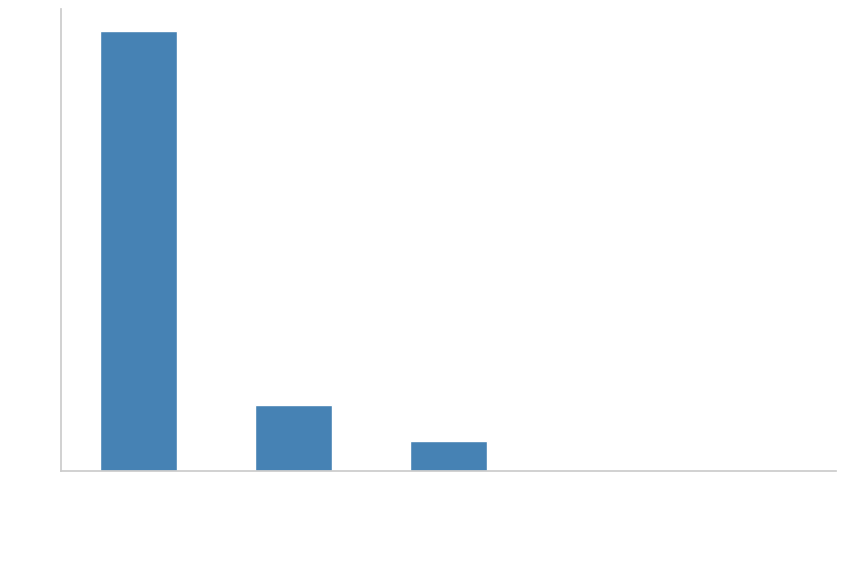

In [311]:
import matplotlib.pyplot as plt
# Calculate value counts for the distribution_channel column and normalize to get percentages
distribution_counts = df['distribution_channel'].value_counts(normalize=True) * 100

# Set figure size
plt.figure(figsize=(10, 6))

# Plot the distribution with dark red or maroon color
ax = distribution_counts.plot(kind='bar', grid=False, color='steelblue')

# Add labels and title with white text
plt.xlabel('Distribution Channel', color='white')  # Set x-axis label color to white
plt.ylabel('Percentage (%)', color='white')  # Set y-axis label color to white
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Set the background color of the figure to None (fully transparent)
ax.set_facecolor('None')

# Remove the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot
save_path_5 = '../images/distribution_of_distribution_channels.png'
plt.savefig(save_path_5, transparent=True, bbox_inches='tight')


In [129]:
specific_rows = test2[(test2["distribution_channel"] == "GDS")]


In [131]:
specific_rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
43284,City Hotel,0,27,2015,September,38,17,0,3,1,...,No Deposit,54.0,NaN,0,Transient,120.0,0,0,Check-Out,2015-09-20
50336,City Hotel,1,36,2016,April,18,29,0,1,1,...,No Deposit,195.0,NaN,0,Transient,111.6,0,0,Canceled,2016-04-19
51325,City Hotel,1,7,2016,May,21,18,0,1,1,...,No Deposit,195.0,NaN,0,Transient,169.0,0,0,Canceled,2016-05-18
51342,City Hotel,1,2,2016,May,21,19,0,1,1,...,No Deposit,195.0,NaN,0,Transient,181.0,0,0,Canceled,2016-05-17
53485,City Hotel,1,2,2016,June,26,22,0,1,1,...,No Deposit,195.0,NaN,0,Transient,124.0,0,0,Canceled,2016-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114943,City Hotel,0,8,2017,June,26,28,0,1,1,...,No Deposit,195.0,NaN,0,Transient,159.0,0,0,Check-Out,2017-06-29
114978,City Hotel,0,8,2017,June,26,29,0,1,1,...,No Deposit,195.0,NaN,0,Transient,170.0,0,0,Check-Out,2017-06-30
115050,City Hotel,0,2,2017,June,26,30,0,1,1,...,No Deposit,195.0,NaN,0,Transient,180.0,0,0,Check-Out,2017-07-01
117283,City Hotel,0,69,2017,August,31,1,0,1,1,...,No Deposit,195.0,NaN,0,Transient,140.0,0,1,Check-Out,2017-08-02


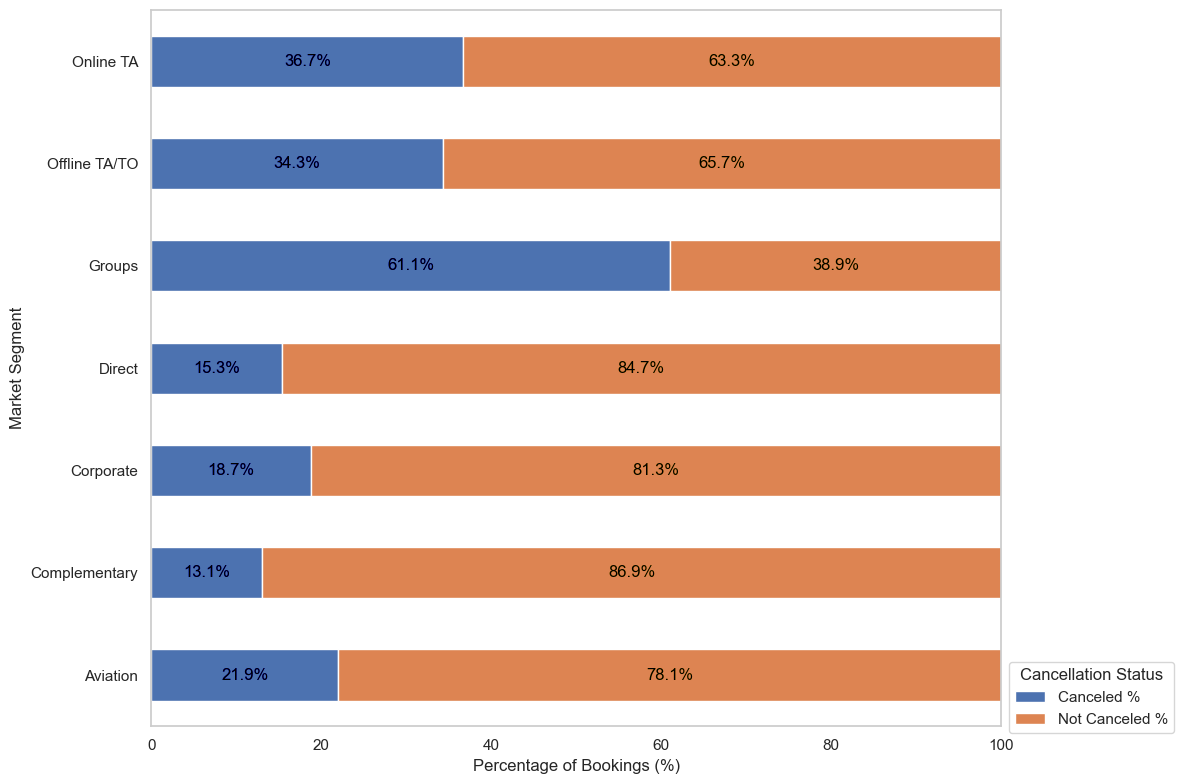

In [164]:
import matplotlib.pyplot as plt

# Remove "Undefined" market segment
test2 = test2[test2['market_segment'] != 'Undefined']

# Define the reversed order of market segments
market_segment_order = ["Aviation", "Complementary", "Corporate", "Direct", "Groups", "Offline TA/TO", "Online TA"]

# Group by market_segment and is_canceled and count the occurrences
aggregated_data = test2.groupby(['market_segment', 'is_canceled']).size().unstack(fill_value=0)

# Reindex the aggregated data to the desired order
aggregated_data = aggregated_data.reindex(market_segment_order)

# Calculate percentage of canceled and not canceled bookings
aggregated_data['Total'] = aggregated_data.sum(axis=1)
aggregated_data['Canceled %'] = aggregated_data[1] / aggregated_data['Total'] * 100
aggregated_data['Not Canceled %'] = aggregated_data[0] / aggregated_data['Total'] * 100

# Plot the data
ax = aggregated_data[['Canceled %', 'Not Canceled %']].plot(kind='barh', stacked=True, figsize=(12, 8))

# Set the plot title and labels
#plt.title('Cancellation Percentage by Market Segment')
plt.ylabel('Market Segment')
plt.xlabel('Percentage of Bookings (%)')
plt.xlim(0, 100)  # Set x-axis limit to 100 for percentage

# Remove grid
plt.grid(False)

# Place percentage values inside each bar
for i, (p_cancelled, p_not_cancelled) in enumerate(zip(aggregated_data['Canceled %'], aggregated_data['Not Canceled %'])):
    ax.text(p_cancelled / 2, i, f'{p_cancelled:.1f}%', color='blue', ha='center', va='center')
    ax.text(100 - p_not_cancelled / 2, i, f'{p_not_cancelled:.1f}%', color='orange', ha='center', va='center')

    # Set color of percentage numbers to black
    ax.text(p_cancelled / 2, i, f'{p_cancelled:.1f}%', color='black', ha='center', va='center')
    ax.text(100 - p_not_cancelled / 2, i, f'{p_not_cancelled:.1f}%', color='black', ha='center', va='center')

# Customize legend position
plt.legend(title='Cancellation Status', loc='upper left', bbox_to_anchor=(1, 0.1))

# Show the plot
plt.tight_layout()
plt.show()


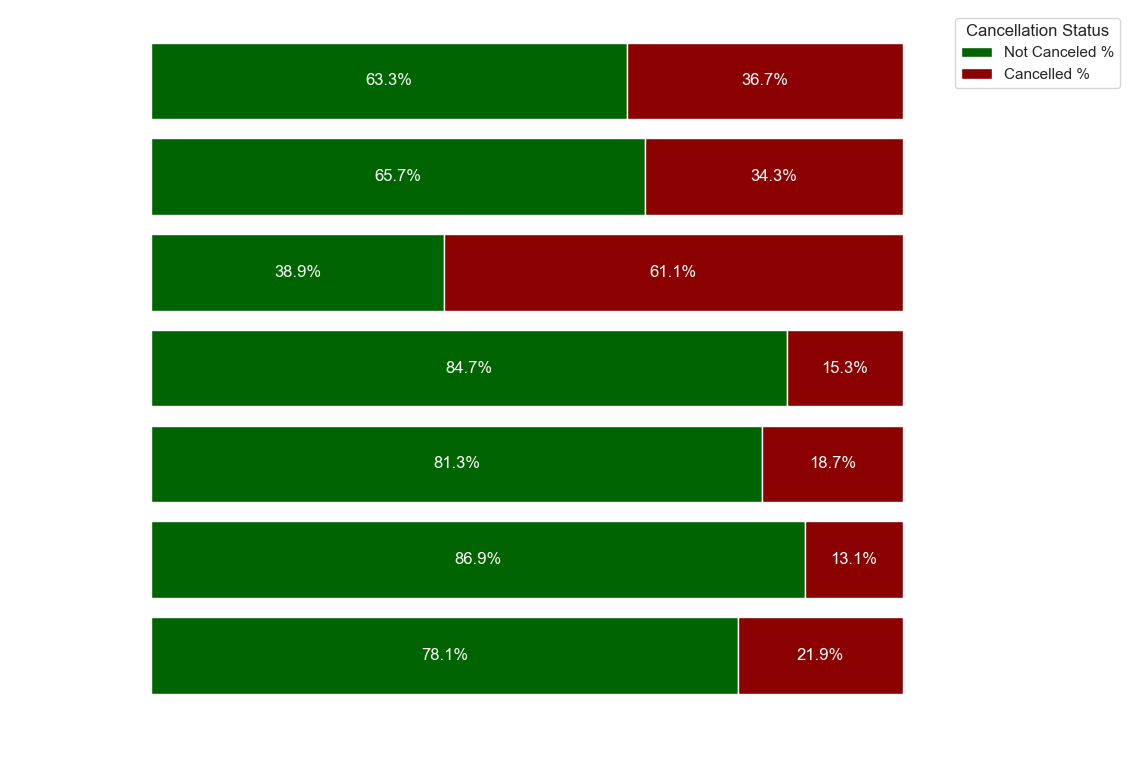

In [246]:
# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(aggregated_data.index, aggregated_data['Not Cancelled %'], color='darkgreen', label='Not Canceled %')
plt.barh(aggregated_data.index, aggregated_data['Cancelled %'], left=aggregated_data['Not Cancelled %'], color='darkred', label='Cancelled %')

# Set the plot title and labels
plt.ylabel('Market Segment', color='white')  # Set y-axis label color to white
plt.xlabel('Percentage of Bookings (%)', color='white')  # Set x-axis label color to white
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlim(0, 100)  # Set x-axis limit to 100 for percentage

# Place percentage values inside each bar
for i, (p_not_cancelled, p_cancelled) in enumerate(zip(aggregated_data['Not Cancelled %'], aggregated_data['Cancelled %'])):
    plt.text(p_not_cancelled / 2, i, f'{p_not_cancelled:.1f}%', color='white', ha='center', va='center')
    plt.text(p_not_cancelled + p_cancelled / 2, i, f'{p_cancelled:.1f}%', color='white', ha='center', va='center')

# Customize legend position
plt.legend(title='Cancellation Status', loc='upper right', bbox_to_anchor=(1.3, 1))

# Remove spines and grid
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)

# Remove background color
plt.gca().set_facecolor('None')

# Save the plot
save_path_4 = '../images/cancellation_percentage_by_market_segment.png'
plt.savefig(save_path_4, transparent=True, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


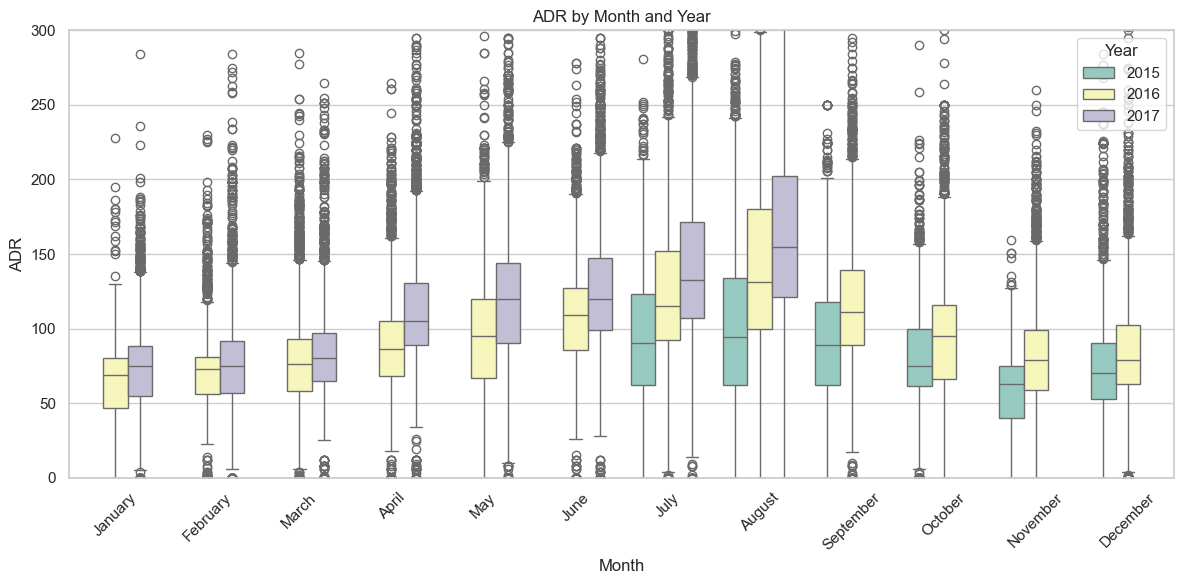

In [137]:

# Define the order of months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert arrival_date_year to numeric
test2['arrival_date_year'] = pd.to_numeric(test2['arrival_date_year'])

# Sort the DataFrame by year and month
test2_sorted = test2.sort_values(by=['arrival_date_year', 'arrival_date_month'], key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))

# Define a color palette
palette = sns.color_palette("Set3", n_colors=test2['arrival_date_year'].nunique())

# Create the box plot with hue (year)
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='arrival_date_month', y='adr', hue='arrival_date_year', data=test2_sorted, order=month_order, palette=palette)
plt.xticks(rotation=45)
plt.title('ADR by Month and Year')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.ylim(0, 300)  # Set custom y-axis limits to focus on the main distribution
plt.tight_layout()
plt.legend(title='Year', loc='upper right')
plt.show()

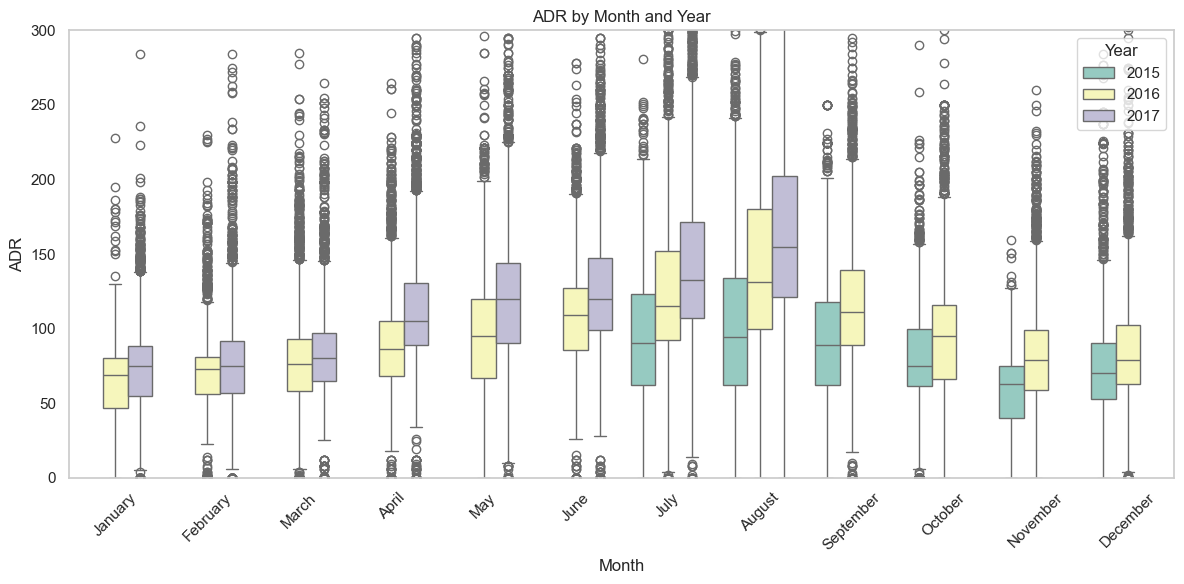

In [138]:


# Define the order of months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert arrival_date_year to numeric
test2['arrival_date_year'] = pd.to_numeric(test2['arrival_date_year'])

# Sort the DataFrame by year and month
test2_sorted = test2.sort_values(by=['arrival_date_year', 'arrival_date_month'], key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))

# Define a color palette
palette = sns.color_palette("Set3", n_colors=test2['arrival_date_year'].nunique())

# Create the box plot with hue (year)
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='arrival_date_month', y='adr', hue='arrival_date_year', data=test2_sorted, order=month_order, palette=palette)
plt.xticks(rotation=45)
plt.title('ADR by Month and Year')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.ylim(0, 300)  # Set custom y-axis limits to focus on the main distribution
plt.tight_layout()
plt.legend(title='Year', loc='upper right')
plt.grid(False)  # Remove the grid
plt.show()


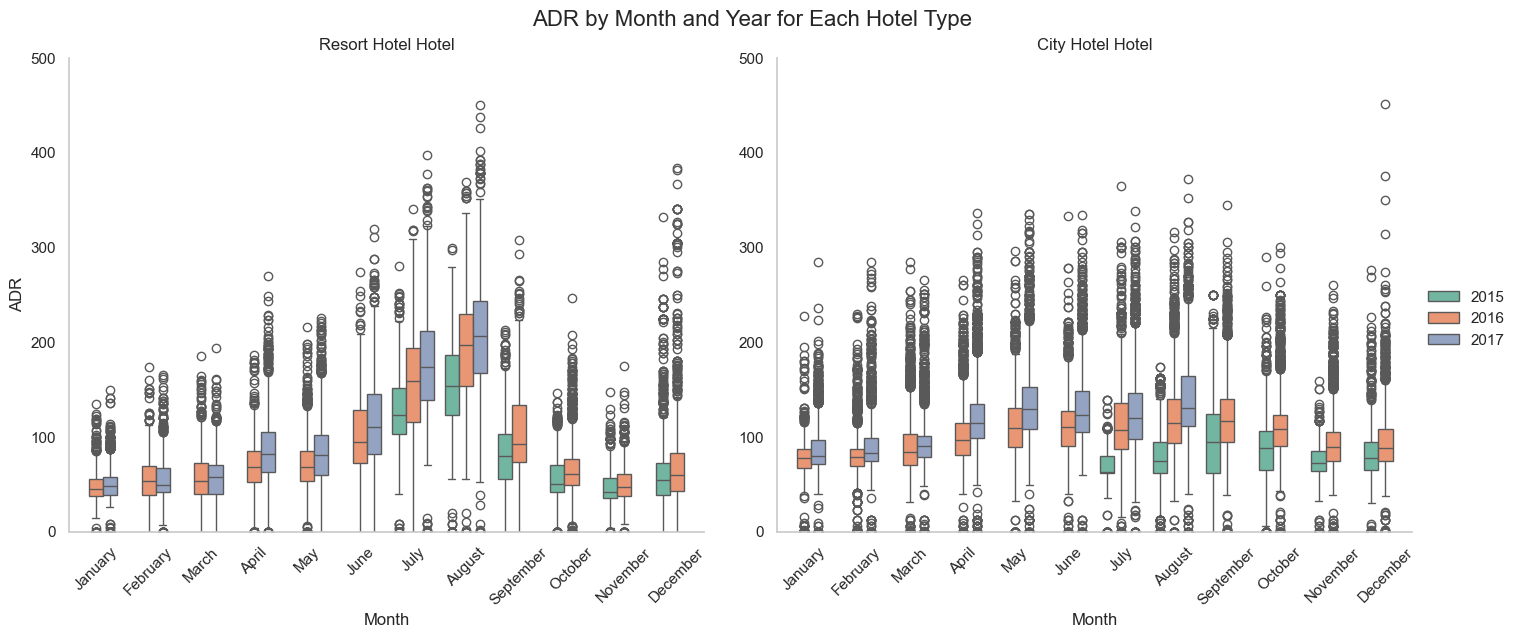

In [139]:
# Define the order of months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert arrival_date_year to numeric
test2['arrival_date_year'] = pd.to_numeric(test2['arrival_date_year'])

# Sort the DataFrame by year and month
test2_sorted = test2.sort_values(by=['arrival_date_year', 'arrival_date_month'], key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))

# Create a FacetGrid for separate plots by hotel type
g = sns.FacetGrid(test2_sorted, col="hotel", height=6, aspect=1.2, sharey=False)

# Map the boxplot to the grid with the Set2 palette
g.map_dataframe(sns.boxplot, x='arrival_date_month', y='adr', hue='arrival_date_year', order=month_order, palette='Set2')

# Remove the grids inside the plots
for ax in g.axes.flat:
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

# Adjust the aesthetics
g.set_xticklabels(rotation=45)
g.set_axis_labels("Month", "ADR")
g.set_titles("{col_name} Hotel")
g.set(ylim=(0, 500))  # Set custom y-axis limits to focus on the main distribution
g.add_legend()

# Show the plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('ADR by Month and Year for Each Hotel Type', fontsize=16)
plt.show()

In [140]:
# Find the index of rows where ADR is negative
negative_adr_index = test2.index[test2['adr'] < 0]

# Drop the rows with negative ADR
test2.drop(index=negative_adr_index, inplace=True)

In [141]:
test2["lead_time"].max()


737

In [142]:
def categorize_lead_time(lead_time):
    if lead_time <= 93:
        return "< 3 months"
    elif 93 < lead_time <= 186:
        return "3 - 6 months"
    elif 186 < lead_time <= 279:
        return "6 - 9 months"
    elif 279 < lead_time <= 365:
        return "9 - 12 months"
    elif 365 < lead_time <= 458:
        return "12 - 15 months"
    elif 458 < lead_time <= 551:
        return "15 - 18 months"
    else:
        return "> 18 months"

In [143]:
test2["lead_time_sorted"] = test2["lead_time"].apply(categorize_lead_time)

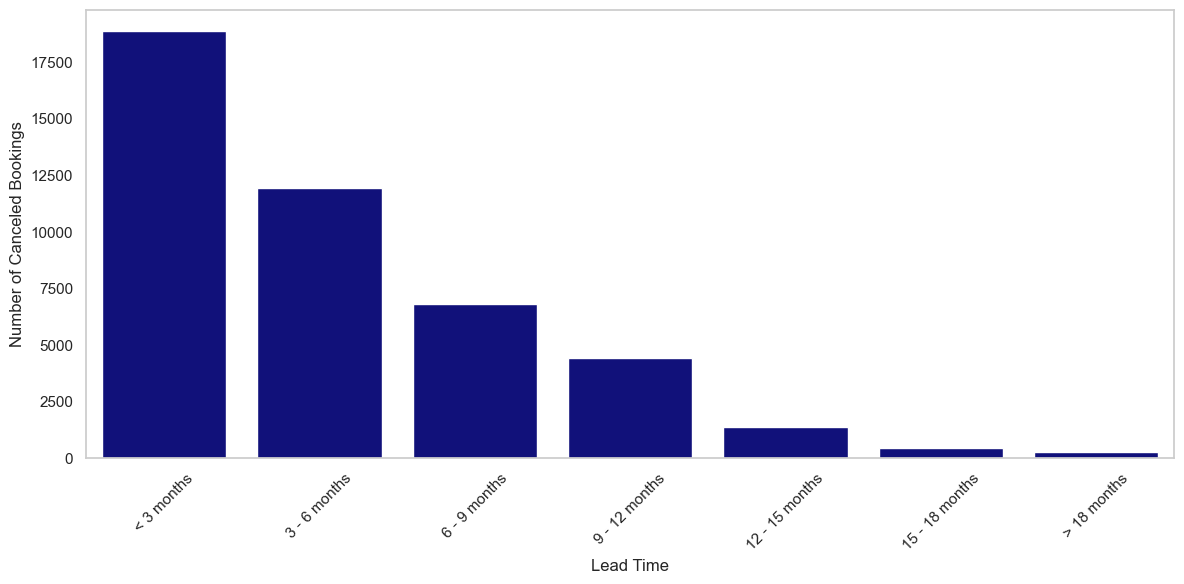

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows where is_canceled is 1
canceled_bookings = test2[test2['is_canceled'] == 1]

# Define the order of lead time categories
lead_time_order = ['< 3 months', '3 - 6 months', '6 - 9 months', '9 - 12 months', '12 - 15 months', '15 - 18 months', '> 18 months']

# Create the bar plot with lead time categories ordered in ascending order and using dark blue color
plt.figure(figsize=(12, 6))
sns.countplot(data=canceled_bookings, x='lead_time_sorted', order=lead_time_order, color='darkblue')

# Add title and labels
#plt.title('Canceled Bookings by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Number of Canceled Bookings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove grid lines
plt.grid(False)

#saving graph
save_path_1 = '../images/canceled_bookings_by_lead_time.png'
plt.savefig(save_path_1)

# Display the plot
plt.tight_layout()
plt.show()


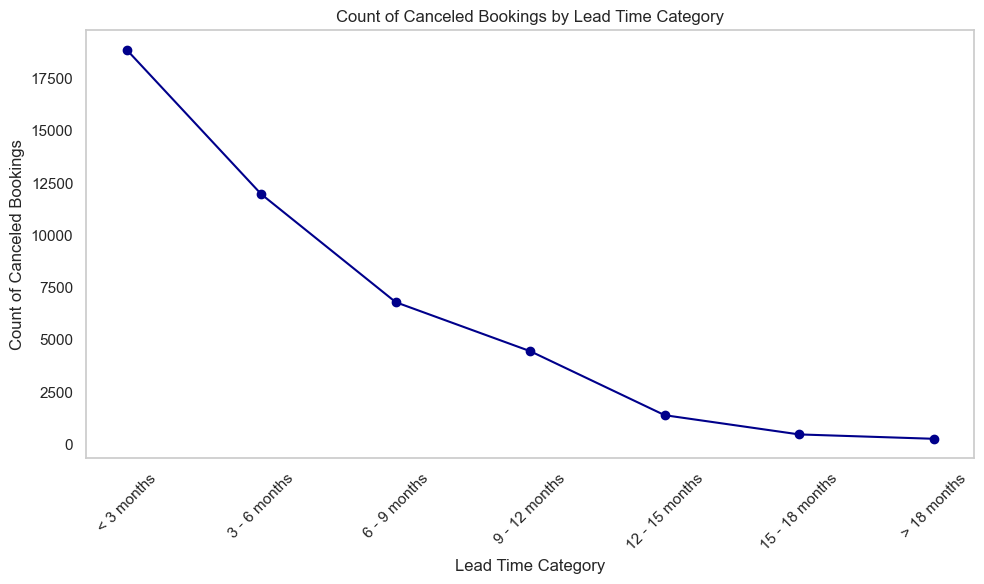

In [147]:
# Group the DataFrame by lead_time_sorted and calculate the count of canceled bookings
cancelled_counts = test2[test2['is_canceled'] == 1].groupby('lead_time_sorted').size()

# Reorder the index to ensure proper sorting
cancelled_counts = cancelled_counts.reindex(['< 3 months', '3 - 6 months', '6 - 9 months', '9 - 12 months', '12 - 15 months', '15 - 18 months', '> 18 months'])

# Create the line plot
plt.figure(figsize=(10, 6))
cancelled_counts.plot(marker='o', color='darkblue', linestyle='-')
plt.title('Count of Canceled Bookings by Lead Time Category')
plt.xlabel('Lead Time Category')
plt.ylabel('Count of Canceled Bookings')
plt.xticks(rotation=45)
plt.grid(axis='both', which='both', linestyle='-', linewidth=0.5)  # Add grid lines to both axes
plt.grid(axis='both', which='both', linestyle='-', linewidth=0.5, color='white')  # Add grid lines to both axes
plt.tight_layout()
plt.show()

In [ ]:
test2["lead_time_sorted"].unique()

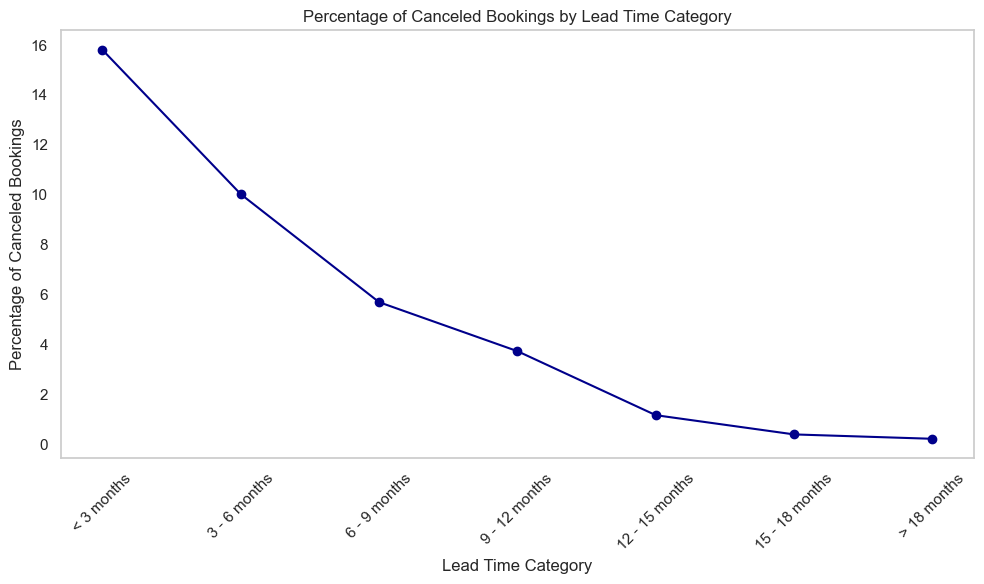

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming test2 is your DataFrame and 'is_canceled' is the column indicating canceled bookings

# Calculate the total number of rows in the DataFrame
total_rows = len(test2)

# Group the DataFrame by lead_time_sorted and calculate the count of canceled bookings for each category
cancelled_counts = test2[test2['is_canceled'] == 1].groupby('lead_time_sorted').size()

# Calculate the percentage of canceled bookings relative to the total number of rows for each lead time category
cancelled_percentage = (cancelled_counts / total_rows) * 100

# Create a DataFrame with the calculated percentages
cancelled_percentage_df = cancelled_percentage.reset_index()
cancelled_percentage_df.columns = ['Lead Time Category', 'Percentage of Canceled Bookings']

# Define the order of lead time categories
category_order = ['< 3 months', '3 - 6 months', '6 - 9 months', '9 - 12 months', '12 - 15 months', '15 - 18 months', '> 18 months']

# Sort the DataFrame by the calculated percentages in ascending order of category_order
cancelled_percentage_sorted = cancelled_percentage_df.sort_values(by='Lead Time Category', key=lambda x: pd.Categorical(x, categories=category_order, ordered=True))

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(cancelled_percentage_sorted['Lead Time Category'], cancelled_percentage_sorted['Percentage of Canceled Bookings'], marker='o', color='darkblue', linestyle='-')
plt.title('Percentage of Canceled Bookings by Lead Time Category')
plt.xlabel('Lead Time Category')
plt.ylabel('Percentage of Canceled Bookings')
plt.xticks(rotation=45)
plt.grid(False)  # Remove grid lines
plt.tight_layout()
plt.show()


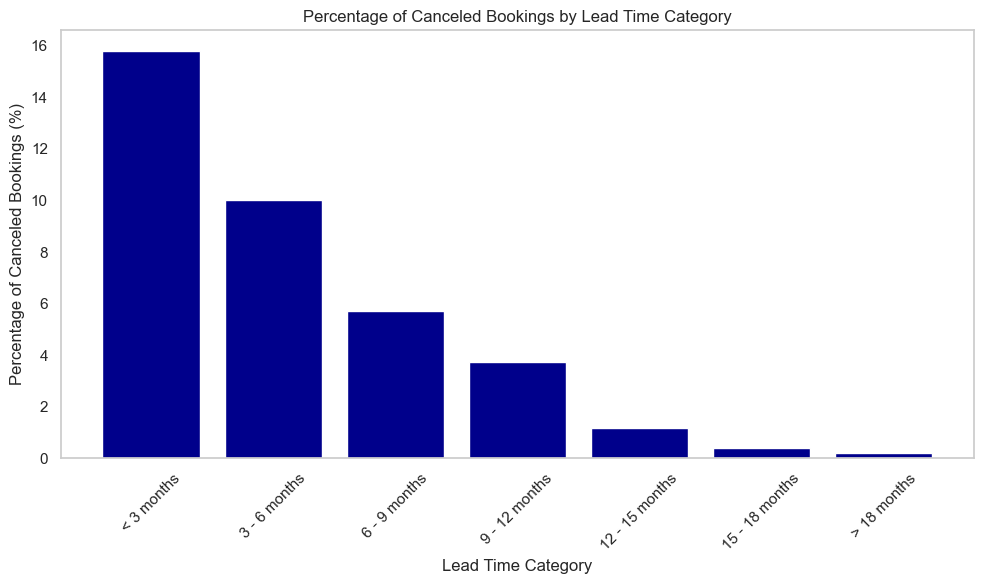

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming test2 is your DataFrame and 'is_canceled' is the column indicating canceled bookings

# Calculate the total number of rows in the DataFrame
total_rows = len(test2)

# Group the DataFrame by lead_time_sorted and calculate the count of canceled bookings for each category
cancelled_counts = test2[test2['is_canceled'] == 1].groupby('lead_time_sorted').size()

# Calculate the percentage of canceled bookings relative to the total number of rows for each lead time category
cancelled_percentage = (cancelled_counts / total_rows) * 100

# Create a DataFrame with the calculated percentages
cancelled_percentage_df = cancelled_percentage.reset_index()
cancelled_percentage_df.columns = ['Lead Time Category', 'Percentage of Canceled Bookings']

# Define the order of lead time categories
category_order = ['< 3 months', '3 - 6 months', '6 - 9 months', '9 - 12 months', '12 - 15 months', '15 - 18 months', '> 18 months']

# Sort the DataFrame by the calculated percentages in ascending order of category_order
cancelled_percentage_sorted = cancelled_percentage_df.sort_values(by='Lead Time Category', key=lambda x: pd.Categorical(x, categories=category_order, ordered=True))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(cancelled_percentage_sorted['Lead Time Category'], cancelled_percentage_sorted['Percentage of Canceled Bookings'], color='darkblue')
#plt.title('Percentage of Canceled Bookings by Lead Time Category')
plt.xlabel('Lead Time Category')
plt.ylabel('Percentage of Canceled Bookings (%)')
plt.xticks(rotation=45)
plt.grid(False)  # Remove grid lines
plt.tight_layout()
save_path_3 = '../images/percenta_of_canceled_bookings.png'
plt.savefig(save_path_3)
plt.show()


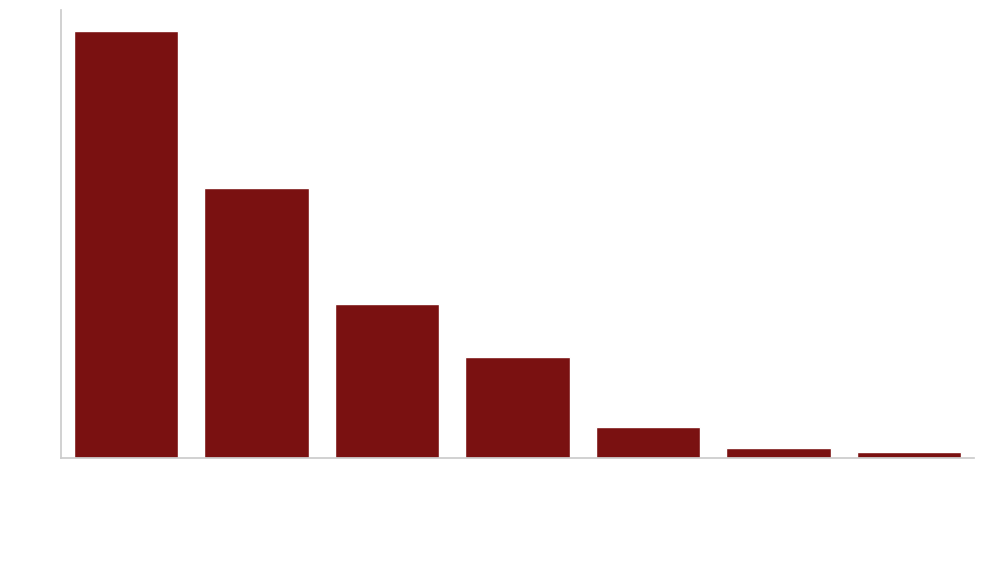

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming test2 is your DataFrame and 'is_canceled' is the column indicating canceled bookings

# Calculate the total number of rows in the DataFrame
total_rows = len(test2)

# Group the DataFrame by lead_time_sorted and calculate the count of canceled bookings for each category
cancelled_counts = test2[test2['is_canceled'] == 1].groupby('lead_time_sorted').size()

# Calculate the percentage of canceled bookings relative to the total number of rows for each lead time category
cancelled_percentage = (cancelled_counts / total_rows) * 100

# Create a DataFrame with the calculated percentages
cancelled_percentage_df = cancelled_percentage.reset_index()
cancelled_percentage_df.columns = ['Lead Time Category', 'Percentage of Canceled Bookings']

# Define the order of lead time categories
category_order = ['< 3 months', '3 - 6 months', '6 - 9 months', '9 - 12 months', '12 - 15 months', '15 - 18 months', '> 18 months']

# Sort the DataFrame by the calculated percentages in ascending order of category_order
cancelled_percentage_sorted = cancelled_percentage_df.sort_values(by='Lead Time Category', key=lambda x: pd.Categorical(x, categories=category_order, ordered=True))

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Lead Time Category', y='Percentage of Canceled Bookings', data=cancelled_percentage_sorted, color='darkred')

# Add labels and title
plt.xlabel('Lead Time Category', color='white')
plt.ylabel('Percentage of Cancelled Bookings (%)', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(False)  # Remove grid lines
plt.tight_layout()

# Set the background color of the figure to be transparent
ax.set_facecolor('none')

# Remove the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot with transparent background
save_path_3 = '../images/percentage_of_canceled_bookings.png'
plt.savefig(save_path_3, transparent=True)

plt.show()


In [150]:
# Calculate the total number of rows in the DataFrame
total_rows = len(test2)

# Count the number of canceled bookings
cancelled_bookings = test2['is_canceled'].sum()

# Calculate the percentage of canceled bookings
cancelled_percentage = (cancelled_bookings / total_rows) * 100

print("Overall percentage of canceled bookings:", cancelled_percentage)

Overall percentage of canceled bookings: 37.040883848325194


In [151]:
test2['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [152]:
test2[test2['market_segment'] == "Complementary"]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_sorted
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-05,< 3 months
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-09-11,< 3 months
2240,Resort Hotel,0,13,2015,October,41,7,0,2,2,...,NaN,NaN,0,Transient,0.0,0,2,Check-Out,2015-10-09,< 3 months
2242,Resort Hotel,0,0,2015,October,41,7,0,1,3,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-10-08,< 3 months
2448,Resort Hotel,0,1,2015,October,42,16,0,1,1,...,NaN,NaN,0,Transient,0.0,0,3,Check-Out,2015-10-17,< 3 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117020,City Hotel,0,85,2017,July,30,27,0,2,2,...,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2017-07-29,< 3 months
117114,City Hotel,0,4,2017,July,30,29,0,1,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-07-30,< 3 months
117229,City Hotel,0,0,2017,July,31,31,1,0,1,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2017-08-01,< 3 months
118762,City Hotel,0,1,2017,August,34,24,0,1,2,...,NaN,NaN,0,Transient,0.0,0,3,Check-Out,2017-08-25,< 3 months


In [153]:
new_data_adr = test2.copy()

In [154]:
new_data = new_data_adr.drop(new_data_adr[new_data_adr['adr'] == 0].index)

In [155]:
new_data["adr"].describe()

count    117428.000000
mean        103.532326
std          49.197782
min           0.260000
25%          70.530000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
new_data[new_data['adr'] == 0.26]


In [ ]:
new_data[new_data['adr'] == 0.50]


In [ ]:
new_data[new_data['adr'] == 1]

In [ ]:
new_data['adr'].unique()

In [156]:
filtered_df = new_data[new_data['adr'] < 0]

# Print the values that are less than 10
print("Values less than 10 in the column:")
print(filtered_df['adr'])

Values less than 10 in the column:
Series([], Name: adr, dtype: float64)


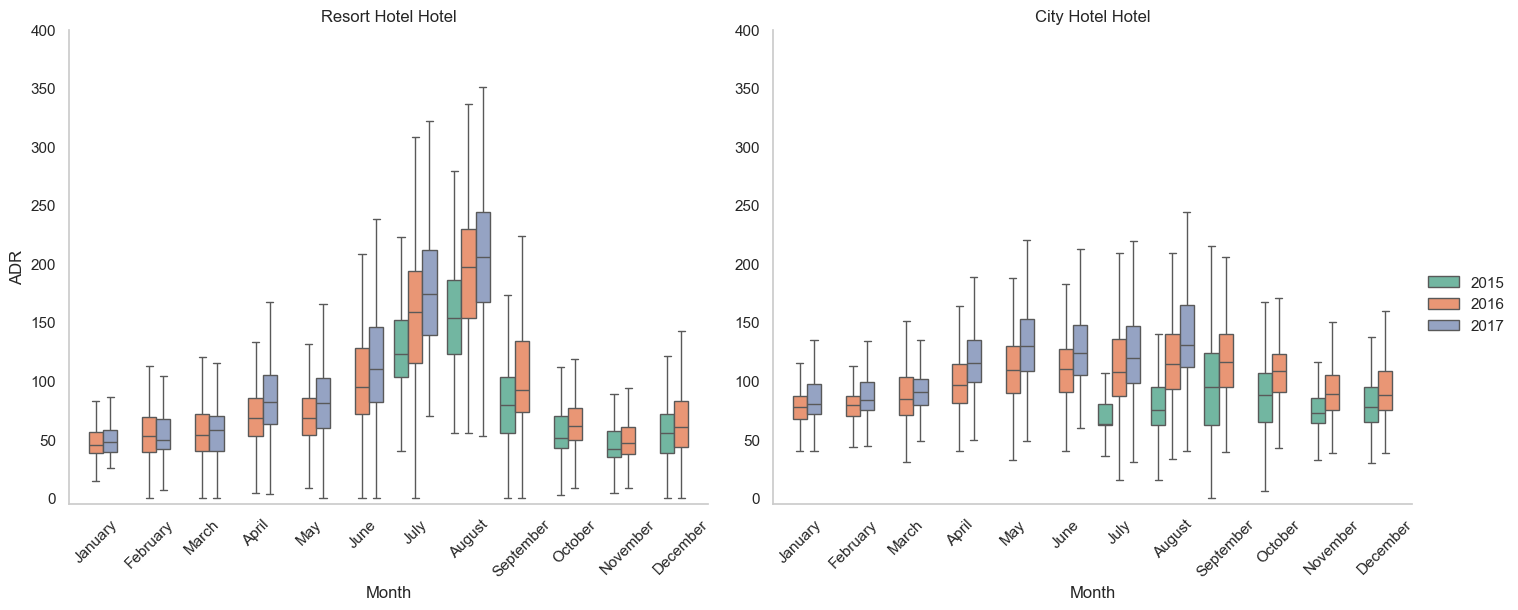

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert arrival_date_year to numeric
test2['arrival_date_year'] = pd.to_numeric(test2['arrival_date_year'])

# Sort the DataFrame by year and month
test2_sorted = test2.sort_values(by=['arrival_date_year', 'arrival_date_month'], key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))

# Create a FacetGrid for separate plots by hotel type
g = sns.FacetGrid(test2_sorted, col="hotel", height=6, aspect=1.2, sharey=False)

# Map the boxplot to the grid with the Set2 palette, and hide outliers
g.map_dataframe(sns.boxplot, x='arrival_date_month', y='adr', hue='arrival_date_year', order=month_order, palette='Set2', showfliers=False)

# Remove the grids inside the plots
for ax in g.axes.flat:
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

# Adjust the aesthetics
g.set_xticklabels(rotation=45)
g.set_axis_labels("Month", "ADR")
g.set_titles("{col_name} Hotel")
g.set(ylim=(-5, 400))  # Set custom y-axis limits to focus on the main distribution
g.add_legend()

# Show the plot
plt.subplots_adjust(top=0.9)
#g.fig.suptitle('ADR by Month and Year for Each Hotel Type (without outliers)', fontsize=16)

save_path_2 = '../images/ADR_by_Month_and_Year.png'
plt.savefig(save_path_2)
plt.show()


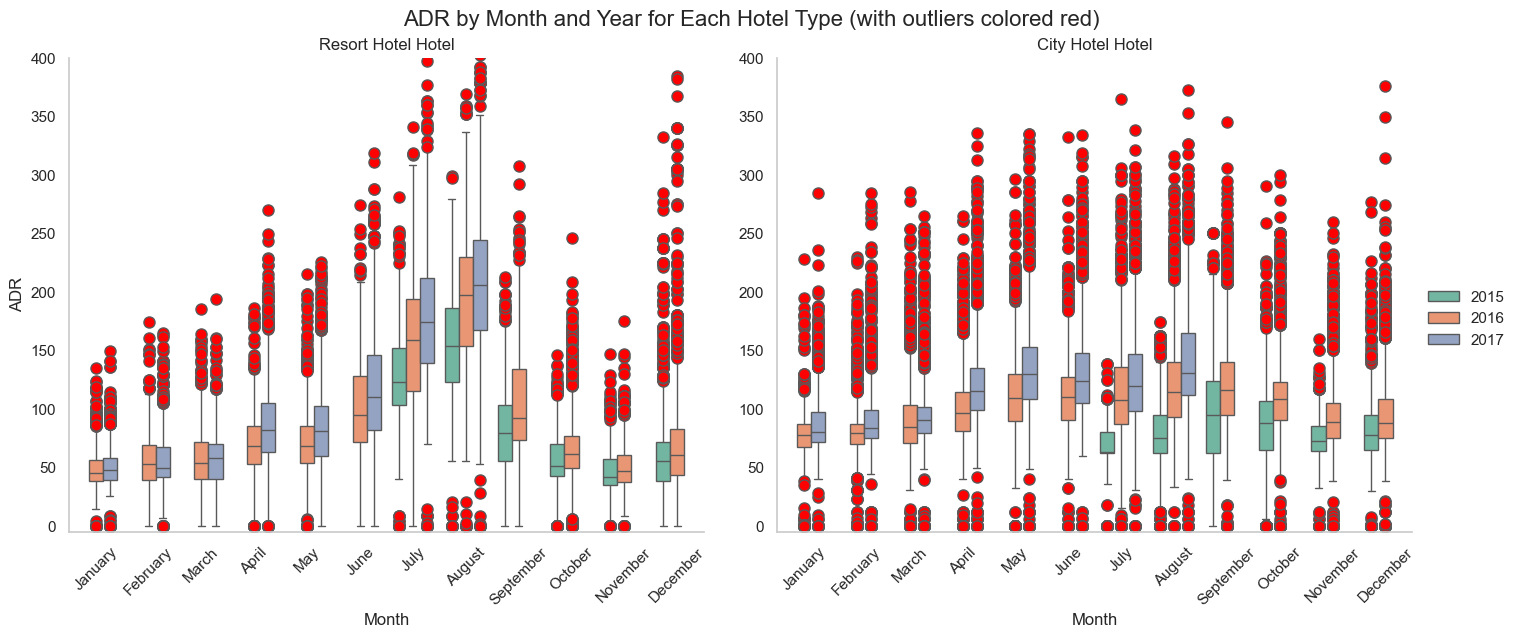

In [159]:
# Define the order of months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert arrival_date_year to numeric
test2['arrival_date_year'] = pd.to_numeric(test2['arrival_date_year'])

# Sort the DataFrame by year and month
test2_sorted = test2.sort_values(by=['arrival_date_year', 'arrival_date_month'], key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))

# Create a FacetGrid for separate plots by hotel type
g = sns.FacetGrid(test2_sorted, col="hotel", height=6, aspect=1.2, sharey=False)

# Define the properties for the outliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Map the boxplot to the grid with the Set2 palette
g.map_dataframe(sns.boxplot, x='arrival_date_month', y='adr', hue='arrival_date_year', order=month_order, palette='Set2', flierprops=flierprops)

# Remove the grids inside the plots
for ax in g.axes.flat:
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

# Adjust the aesthetics
g.set_xticklabels(rotation=45)
g.set_axis_labels("Month", "ADR")
g.set_titles("{col_name} Hotel")
g.set(ylim=(-5, 400))  # Set custom y-axis limits to focus on the main distribution
g.add_legend()

# Show the plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('ADR by Month and Year for Each Hotel Type (with outliers colored red)', fontsize=16)
plt.show()

In [160]:
num_unique_countries = len(test2["country"].unique())


/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_1497/422238207.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country', y='Count', data=top_ten_countries_df, palette='viridis')


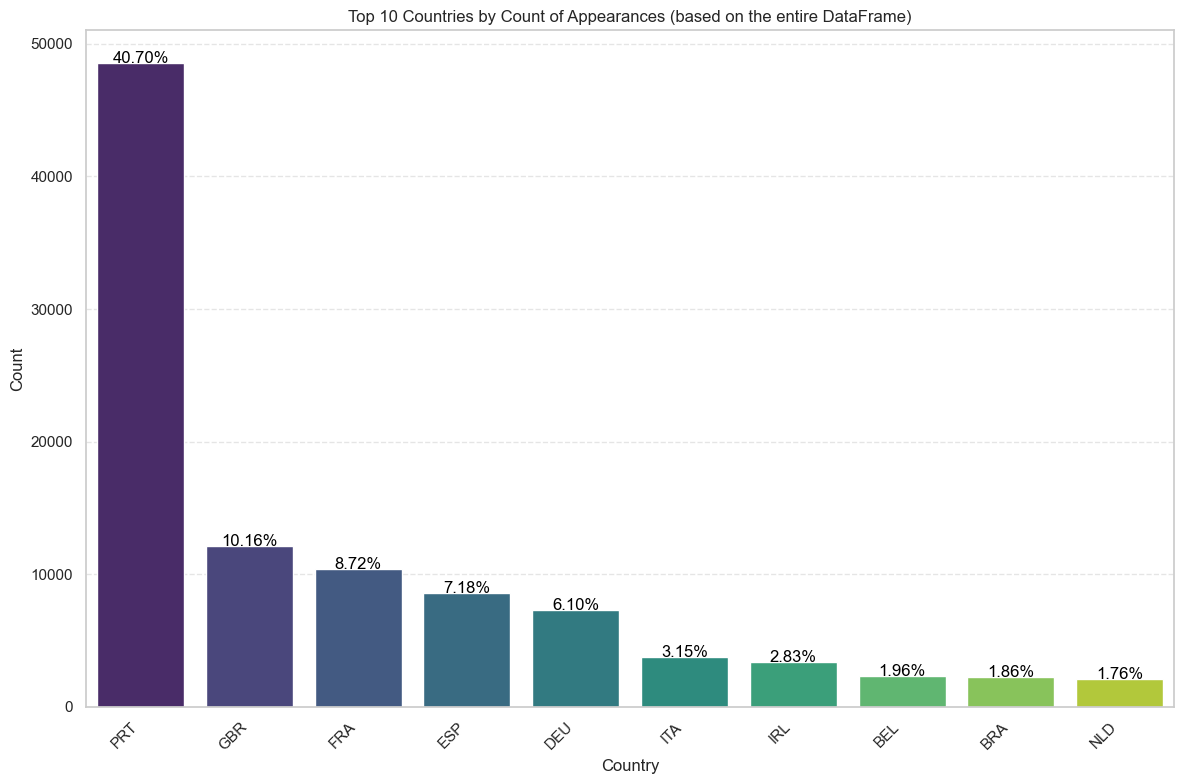

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming test2 is your DataFrame and 'country' is the column with country codes

# Get the counts of each country
country_counts = test2['country'].value_counts()

# Select the top 10 countries
top_ten_countries = country_counts.head(10)

# Create a DataFrame for the top 10 countries
top_ten_countries_df = top_ten_countries.reset_index()
top_ten_countries_df.columns = ['Country', 'Count']

# Calculate the percentage for each of the top 10 countries based on the entire DataFrame
top_ten_countries_percentage = (top_ten_countries / len(test2)) * 100

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Country', y='Count', data=top_ten_countries_df, palette='viridis')

# Annotate the percentages on top of the bars
for index, row in top_ten_countries_df.iterrows():
    percentage = top_ten_countries_percentage[top_ten_countries_df['Country'][index]]
    ax.text(index, row['Count'], f"{percentage:.2f}%", color='black', ha="center")

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Count of Appearances (based on the entire DataFrame)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the grid lines inside the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_1497/1488478732.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Country', data=top_five_countries_df, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

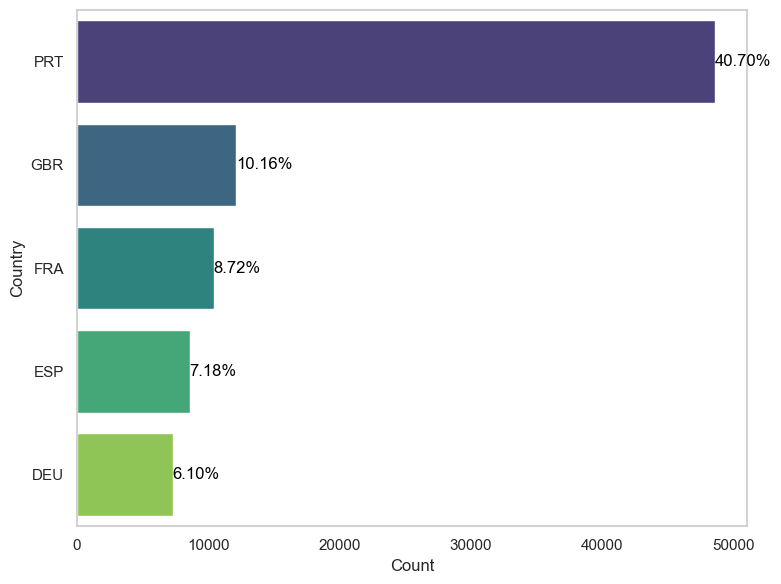

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming test2 is your DataFrame and 'country' is the column with country codes

# Get the counts of each country
country_counts = test2['country'].value_counts()

# Select the top 5 countries
top_five_countries = country_counts.head(5)

# Create a DataFrame for the top 5 countries
top_five_countries_df = top_five_countries.reset_index()
top_five_countries_df.columns = ['Country', 'Count']

# Calculate the percentage for each of the top 5 countries based on the entire DataFrame
top_five_countries_percentage = (top_five_countries / len(test2)) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Count', y='Country', data=top_five_countries_df, palette='viridis')

# Annotate the percentages on top of the bars
for index, row in top_five_countries_df.iterrows():
    percentage = top_five_countries_percentage[top_five_countries_df['Country'][index]]
    ax.text(row['Count'], index, f"{percentage:.2f}%", color='black', va='center')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Country')
#plt.title('Top 5 Countries by Count of Appearances (based on the entire DataFrame)')

# Remove grid lines
plt.grid(False)

#saving graph
save_path = '../images/top_5_countries.png'
plt.savefig(save_path)

# Show the plot
plt.tight_layout()
plt.show



/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_1497/1532187746.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Country', data=top_five_countries_df, palette=colors)


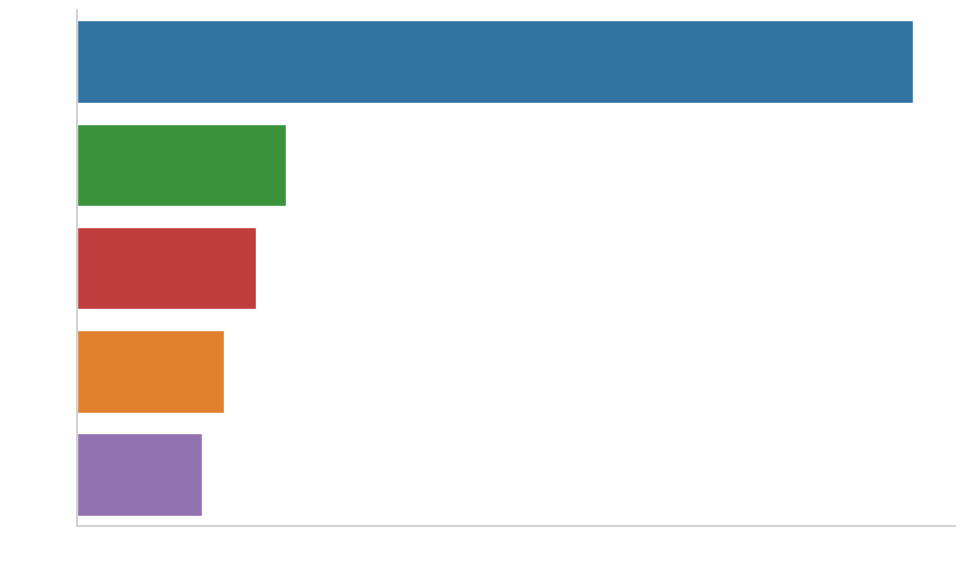

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming test2 is your DataFrame and 'country' is the column with country codes
# Get the counts of each country
country_counts = test2['country'].value_counts()

# Select the top 5 countries
top_five_countries = country_counts.head(5)

# Create a DataFrame for the top 5 countries
top_five_countries_df = top_five_countries.reset_index()
top_five_countries_df.columns = ['Country', 'Count']

# Calculate the percentage for each of the top 5 countries based on the entire DataFrame
top_five_countries_percentage = (top_five_countries / len(test2)) * 100

# Choose colors that stand out from dark grey
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e', '#9467bd']

# Create a bar plot
plt.figure(figsize=(10, 6))  # Increase the width of the figure
ax = sns.barplot(x='Count', y='Country', data=top_five_countries_df, palette=colors)

# Annotate the percentages on top of the bars
for index, row in top_five_countries_df.iterrows():
    percentage = top_five_countries_percentage[top_five_countries_df['Country'][index]]
    ax.text(row['Count'], index, f"{percentage:.2f}%", color='white', va='center')

# Add labels and title
plt.xlabel('Count', color='white')
plt.ylabel('Country', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

# Remove grid lines
ax.grid(False)

# Set background to transparent
ax.set_facecolor('none')

# Remove the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot
save_path = '../images/top_5_countries.png'
plt.savefig(save_path, transparent=True)

# Show the plot
plt.tight_layout()
plt.show()


